![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Use K Means to compress color spaces of images

One common example of K Means Clustering is to compress the colour spaces of images. An image usually comes with a 24-bit colour depth, meaning 2^24 = 16,777,216 colour variations.

K Means can be used to organize the colour variations into the their respective colour clusters. The "K" (number of cluster) here will be the the number of colour space. If K is set to 8, the available colour space is 8. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans 

%matplotlib inline

Read your image by using skimage and load it into a numpy array.

In [2]:
url = "https://ia801402.us.archive.org/2/items/ml-fundamentals-data/machine-learning-fundamentals-data/cat.jpg"
image = io.imread(url)

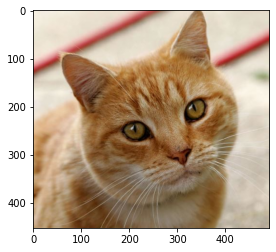

In [3]:
plt.imshow(image)

Show the dimension of the input picture, (Height, Width, Depth)

In [4]:
image.shape

(453, 492, 3)

Every colour channel has 256 possible values, the number of possible colours is 256 * 256 * 256 = 16,777,216, approx 16 million colours. Let us reduce the color space from 16 million to 8 colours.

In [5]:
image_scaled = image / 255.0 # use 0...1 scale
image_scaled = image_scaled.reshape((-1, 3))
image_scaled.shape

(222876, 3)

In [6]:
num_clusters = 8
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [7]:
model.fit(image_scaled.astype(np.float32))

KMeans()

Get the: 
- cluster_centers_ : Coordinates of cluster centers.
- labels_ : Labels of each point
- inertia_ : Sum of squared distance from each point to their corresponding center

In [8]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

The generated clusters corresponds to the 8 colors of our reduced color palette.

Visual inspection of the centroids array shows that all colours have three channels (B, G, R) with values ranging between 0 and 1.

In [9]:
centroids

array([[0.44808006, 0.2840936 , 0.1351203 ],
       [0.8354373 , 0.75588506, 0.6743256 ],
       [0.6561513 , 0.51628447, 0.36975622],
       [0.5023183 , 0.40940642, 0.3022624 ],
       [0.75933754, 0.6359653 , 0.5117493 ],
       [0.9130926 , 0.8762172 , 0.8116659 ],
       [0.20797107, 0.10171816, 0.03201011],
       [0.59710914, 0.3868357 , 0.21967657]], dtype=float32)

The labels will equal to the number of clusters that we have set.

In [10]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

These 8 colours correspond to the 8 cluster labels contained in the labels vector.

We want all our data points with label 0 to be colored according to row 0 in the centers array whereas all data points with label 1 to be colored according to row 1 in the centers array and same for other labels.

We use labels as an index into the centroids array which is also represents our new colours.

In [11]:
new_colours = centroids[labels].reshape((-1, 3))

In [12]:
image_compressed = new_colours.reshape(image.shape)

Text(0.5, 1.0, '8 Colour Image')

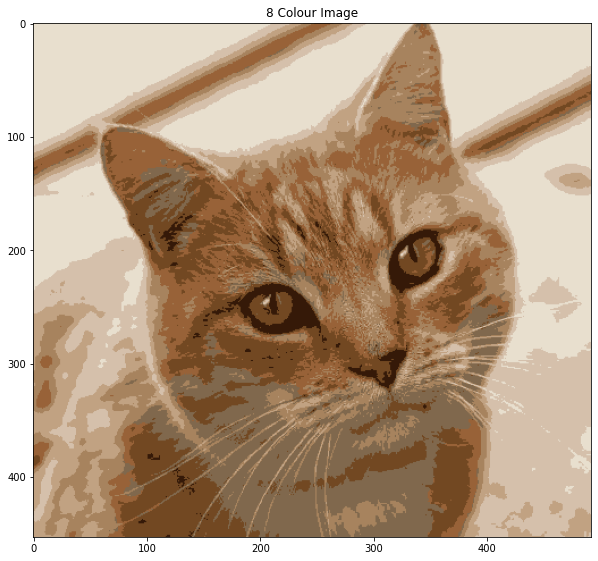

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed);
plt.title('8 Colour Image')

Let try to do another round of color space compression but this time we only manipulate the 1 channel colour space.

In [14]:
url = "https://ia801402.us.archive.org/2/items/ml-fundamentals-data/machine-learning-fundamentals-data/cat.jpg"
image = io.imread(url, as_gray=True)

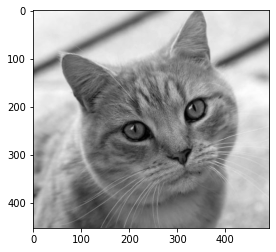

In [15]:
plt.imshow(image, cmap='gray')

In [16]:
image.shape

(453, 492)

Scale the pixel values into a range of 0 to 1.

In [17]:
image_scaled = image / 255.0 
image_scaled = image_scaled.reshape((-1, 1))
image_scaled.shape

(222876, 1)

In [18]:
image_scaled

array([[0.00369497],
       [0.00369497],
       [0.00369497],
       ...,
       [0.00274345],
       [0.00275883],
       [0.00275883]])

In [19]:
num_clusters = 4
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [20]:
model.fit(image_scaled.astype(np.float32))

KMeans(n_clusters=4)

In [21]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

In [22]:
centroids

array([[0.00187   ],
       [0.0033764 ],
       [0.00123807],
       [0.00267386]], dtype=float32)

In [23]:
new_colours = centroids[labels].reshape((-1, 1))

In [24]:
image_compressed = new_colours.reshape(image.shape)

Text(0.5, 1.0, '4 Colour Image')

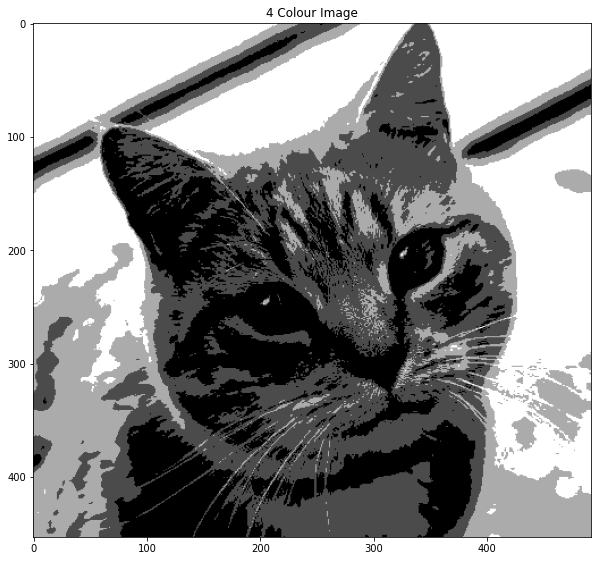

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed, cmap='gray');
plt.title('4 Colour Image')

# Try With Your Own Image

On this section, let us try using your own image to try out the colour reduction
<br>Do remember upload your file into the data folder

In [26]:
path = "../data/certifai.jpg"

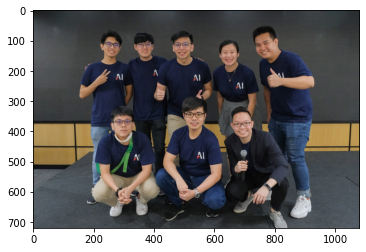

In [27]:
self_image = io.imread(path)
plt.imshow(self_image)

In [28]:
self_image_scale = self_image / 255 #Scale to value between 0 to 1
self_image_scale = self_image_scale.reshape((-1, 3))

Using Elbow method to visualize the best cluster to pick

In [29]:
k_values = np.arange(2,10)
inertia = []
for k in k_values:
    model = KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(self_image_scale)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

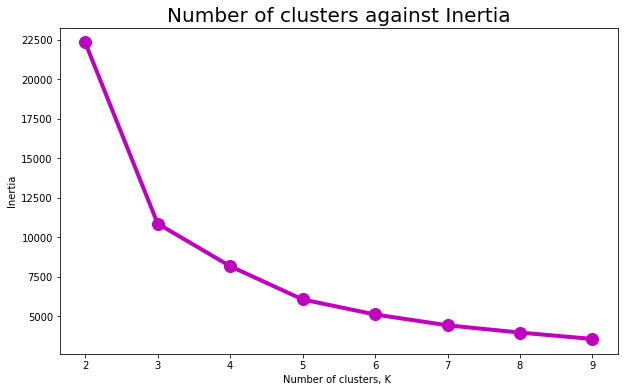

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,inertia,"o-m",linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia",fontsize=20)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

From the graph we can see that the inertia decrease significantly until 3 clusters, therefore we will pick cluster = 3

In [31]:
cluster = 3

model = KMeans(init='k-means++', n_clusters=cluster, n_init=10)
model.fit((self_image_scale.astype(np.float32)))

KMeans(n_clusters=3)

In [32]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

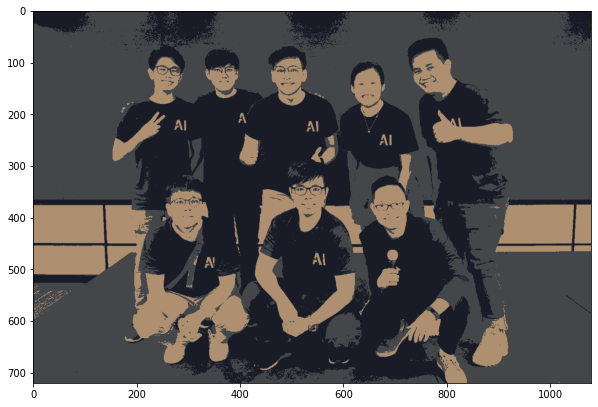

In [33]:
new_colours = centroids[labels].reshape((-1, 3))
image_compressed = new_colours.reshape(self_image.shape)
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed);